In [1]:
provinces = ['BKK', 'Chiangmai', 'Khonkaen', 'Rayong', 'Saraburi', 'Surat']

In [2]:
import pandas as pd

In [3]:

def format_datetime(df):
  df['date_time'] = pd.to_datetime(df['date_time'])
  df = df.set_index('date_time')
  return df

In [4]:
def format_datetime_2(df):
    df['date_time'] = pd.to_datetime(df['date_time'] , format='%d/%m/%Y %H:%M')
    df = df.set_index('date_time')
    return df

In [16]:
def get_train_data(prov):
  df_train = pd.read_csv(prov + '/train/' + prov.lower() + '_train.csv')
  df_temp_surface = pd.read_csv(prov + '/train/' + prov.lower() + '_temp_surface.csv')
  df_weather_wind = pd.read_csv(prov + '/train/' + prov.lower() + '_weather_wind.csv')
  df_so2 = pd.read_csv(prov + '/train/' + prov.lower() + '_so2_surface_train.csv')
  df_rh = pd.read_csv(prov + '/train/' + prov.lower() + '_RH_train.csv')
  df_train = df_train.rename(columns={'Unnamed: 0':'date_time'})
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = format_datetime(df_train), format_datetime(df_temp_surface), format_datetime(df_weather_wind), format_datetime(df_so2), format_datetime(df_rh)
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.interpolate(), df_temp_surface.interpolate(), df_weather_wind.interpolate(), df_so2.interpolate(), df_rh.interpolate()
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.resample('h').ffill(), df_temp_surface.resample('h').ffill(), df_weather_wind.resample('h').ffill(), df_so2.resample('h').ffill(), df_rh.resample('h').ffill()
  return df_train, df_temp_surface, df_weather_wind, df_so2, df_rh

In [11]:
def get_test_data(prov):
  df_test = pd.read_csv(f'{prov}/test/{prov.lower()}_test.csv')
  df_temp_surface_test = pd.read_csv(f'{prov}/test/{prov.lower()}_temp_surface_test.csv')
  df_weather_wind_test = pd.read_csv(f'{prov}/test/{prov.lower()}_weather_wind_test.csv')
  df_so2_test = pd.read_csv(prov + '/test/' + prov.lower() + '_so2_surface_test.csv')
  df_rh_test = pd.read_csv(prov + '/test/' + prov.lower() + '_RH_test.csv')
  df_test = df_test.rename(columns={'Unnamed: 0':'date_time'})
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = format_datetime(df_test), format_datetime_2(df_temp_surface_test), format_datetime_2(df_weather_wind_test),format_datetime(df_so2_test),format_datetime(df_rh_test)
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = df_test.interpolate(), df_temp_surface_test.interpolate(), df_weather_wind_test.interpolate(), df_so2_test.interpolate(), df_rh_test.interpolate()
  df_test, df_temp_surface_test,df_weather_wind_test, df_so2_test, df_rh_test = df_test.resample('h').ffill(), df_temp_surface_test.resample('h').ffill(), df_weather_wind_test.resample('h').ffill(), df_so2_test.resample('h').ffill(), df_rh_test.resample('h').ffill()
  return df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test

In [12]:
def get_na_rows(df, col):
  return df[df[col].isna() == True].index.to_list()

In [17]:
df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = get_train_data('Rayong')
df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = get_test_data('Rayong')

In [18]:
display(df_test.tail())
display(df_temp_surface_test.tail())
display(df_weather_wind_test.tail())
display(df_so2_test.tail())
display(df_rh_test.tail())

,PM2.5
date_time,
2021-07-01 19:00:00,16.0
2021-07-01 20:00:00,16.0
2021-07-01 21:00:00,16.0
2021-07-01 22:00:00,16.0
2021-07-01 23:00:00,16.0


,temp
date_time,
2021-07-01 18:00:00,29.9
2021-07-01 19:00:00,28.5
2021-07-01 20:00:00,28.5
2021-07-01 21:00:00,28.5
2021-07-01 22:00:00,28.2


,wind speed,wind dir
date_time,,
2021-07-01 18:00:00,21,255
2021-07-01 19:00:00,25,255
2021-07-01 20:00:00,25,255
2021-07-01 21:00:00,25,255
2021-07-01 22:00:00,24,245


,so2 (ug/m^3)
date_time,
2021-07-01 18:00:00,0.36
2021-07-01 19:00:00,0.55
2021-07-01 20:00:00,0.55
2021-07-01 21:00:00,0.55
2021-07-01 22:00:00,0.46


,RH
date_time,
2021-07-01 18:00:00,68.0
2021-07-01 19:00:00,74.0
2021-07-01 20:00:00,74.0
2021-07-01 21:00:00,74.0
2021-07-01 22:00:00,77.0


In [19]:
display(df_train.tail())
display(df_temp_surface.tail())
display(df_weather_wind.tail())
display(df_so2.tail())
display(df_rh.tail())

,PM2.5
date_time,
2020-06-30 19:00:00,11.0
2020-06-30 20:00:00,10.0
2020-06-30 21:00:00,9.0
2020-06-30 22:00:00,8.0
2020-06-30 23:00:00,7.0


,temp
date_time,
2020-06-30 18:00:00,28.0
2020-06-30 19:00:00,27.9
2020-06-30 20:00:00,27.9
2020-06-30 21:00:00,27.9
2020-06-30 22:00:00,28.5


,wind speed,wind dir
date_time,,
2020-06-30 18:00:00,41,265
2020-06-30 19:00:00,36,280
2020-06-30 20:00:00,36,280
2020-06-30 21:00:00,36,280
2020-06-30 22:00:00,47,270


,so2 (ug/m^3)
date_time,
2020-06-30 18:00:00,0.32
2020-06-30 19:00:00,0.36
2020-06-30 20:00:00,0.36
2020-06-30 21:00:00,0.36
2020-06-30 22:00:00,0.40


,RH
date_time,
2020-06-30 18:00:00,81.0
2020-06-30 19:00:00,81.0
2020-06-30 20:00:00,81.0
2020-06-30 21:00:00,81.0
2020-06-30 22:00:00,78.0


In [20]:
import matplotlib.pyplot as plt

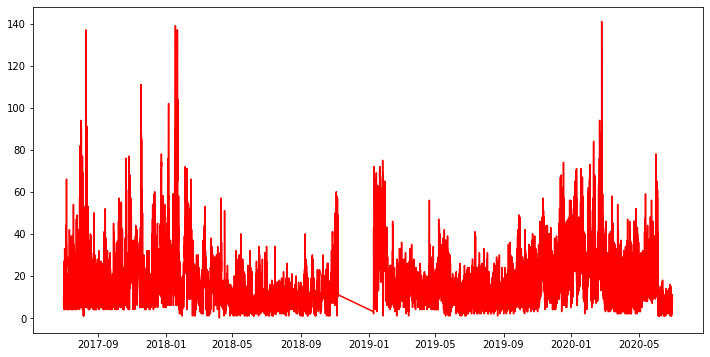

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df_train,'r')

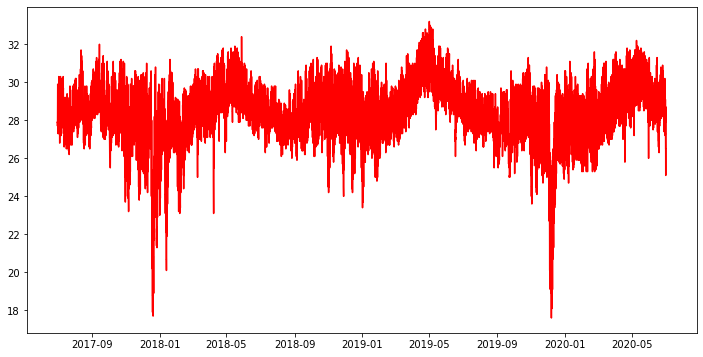

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df_temp_surface,'r')

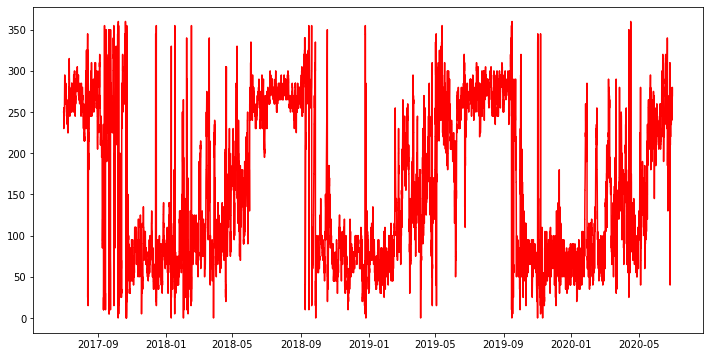

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind dir'],'r')

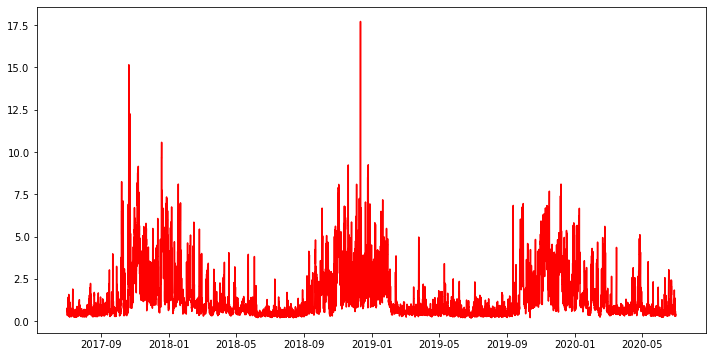

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df_so2['so2 (ug/m^3)'],'r')

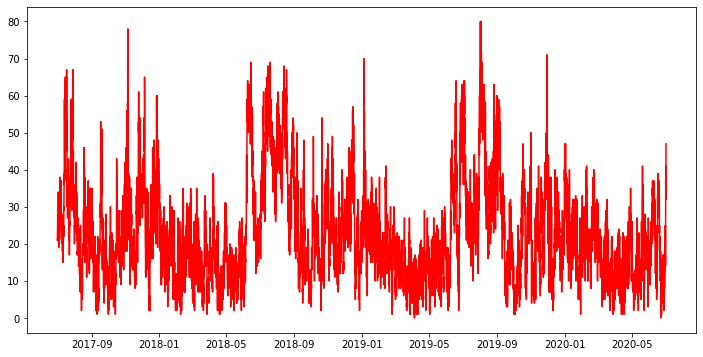

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind speed'],'r')

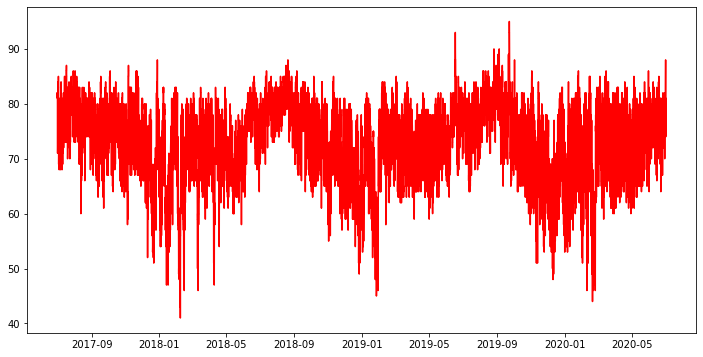

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df_rh['RH'],'r')

In [27]:
df_temp_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'temp':[0]})
df_temp_0 = format_datetime(df_temp_0)
df_wind_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_0 = format_datetime(df_wind_0)
df_so2_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_0 = format_datetime(df_so2_0)
df_rh_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'RH':[0]})
df_rh_0 = format_datetime(df_rh_0)

In [28]:
df_temp_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'temp':[df_temp_surface['temp'].iloc[26301]]})
df_temp_1 = format_datetime(df_temp_1)
df_wind_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'wind dir':[df_weather_wind['wind dir'].iloc[26301]],'wind speed':[df_weather_wind['wind speed'].iloc[26301]]})
df_wind_1 = format_datetime(df_wind_1)
df_so2_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'so2 (ug/m^3)':[df_so2['so2 (ug/m^3)'].iloc[26301]]})
df_so2_1 = format_datetime(df_so2_1)
df_rh_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'RH':[df_rh['RH'].iloc[26301]]})
df_rh_1 = format_datetime(df_rh_1)

In [29]:
df_temp_surface = pd.concat([df_temp_0,df_temp_surface,df_temp_1])
df_weather_wind = pd.concat([df_wind_0,df_weather_wind,df_wind_1])
df_so2 = pd.concat([df_so2_0,df_so2,df_so2_1])
df_rh = pd.concat([df_rh_0,df_rh,df_rh_1])

In [30]:
data = df_train.merge(df_weather_wind,left_index=True,right_index=True)
data = data.merge(df_temp_surface,left_index=True,right_index=True)
data = data.merge(df_so2,left_index=True,right_index=True)
data = data.merge(df_rh,left_index=True,right_index=True)
data

,PM2.5,wind dir,wind speed,temp,so2 (ug/m^3),RH
date_time,,,,,,
2017-07-01 00:00:00,10.0,0,0,0.0,0.00,0.0
2017-07-01 01:00:00,6.0,250,21,27.9,0.58,82.0
2017-07-01 02:00:00,6.0,250,21,27.9,0.58,82.0
2017-07-01 03:00:00,5.0,250,21,27.9,0.58,82.0
2017-07-01 04:00:00,10.0,250,21,27.7,0.62,81.0
...,...,...,...,...,...,...
2020-06-30 19:00:00,11.0,280,36,27.9,0.36,81.0
2020-06-30 20:00:00,10.0,280,36,27.9,0.36,81.0
2020-06-30 21:00:00,9.0,280,36,27.9,0.36,81.0


In [31]:
df_temp_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'temp':[0]})
df_temp_test_0 = format_datetime(df_temp_test_0)
df_wind_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_test_0 = format_datetime(df_wind_test_0)
df_so2_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_test_0 = format_datetime(df_so2_test_0)
df_rh_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'RH':[0]})
df_rh_test_0 = format_datetime(df_rh_test_0)

In [32]:
df_temp_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'temp':[df_temp_surface_test['temp'].iloc[8781]]})
df_temp_test_1 = format_datetime(df_temp_test_1)
df_wind_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'wind dir':[df_weather_wind_test['wind dir'].iloc[8781]],'wind speed':[df_weather_wind_test['wind speed'].iloc[8781]]})
df_wind_test_1 = format_datetime(df_wind_test_1)
df_so2_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'so2 (ug/m^3)':[df_so2_test['so2 (ug/m^3)'].iloc[8781]]})
df_so2_test_1 = format_datetime(df_so2_test_1)
df_rh_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'RH':[df_rh_test['RH'].iloc[8781]]})
df_rh_test_1 = format_datetime(df_rh_test_1)

In [33]:
df_temp_surface_test = pd.concat([df_temp_test_0,df_temp_surface_test,df_temp_test_1])
df_weather_wind_test = pd.concat([df_wind_test_0,df_weather_wind_test,df_wind_test_1])
df_so2_test = pd.concat([df_so2_test_0,df_so2_test,df_so2_test_1])
df_rh_test = pd.concat([df_rh_test_0,df_rh_test,df_rh_test_1])

In [34]:
test = df_test.merge(df_temp_surface_test,left_index=True,right_index=True)
test['wind dir'] = df_weather_wind_test['wind dir'].values
test['wind speed'] = df_weather_wind_test['wind speed'].values
test = test.merge(df_so2_test,left_index=True,right_index=True)
test = test.merge(df_rh_test,left_index=True,right_index=True)
test

,PM2.5,temp,wind dir,wind speed,so2 (ug/m^3),RH
date_time,,,,,,
2020-07-01 00:00:00,5.0,0.0,0,0,0.00,0.0
2020-07-01 01:00:00,3.0,28.2,260,41,0.47,78.0
2020-07-01 02:00:00,2.0,28.2,260,41,0.47,78.0
2020-07-01 03:00:00,4.0,28.2,260,41,0.47,78.0
2020-07-01 04:00:00,3.0,27.8,260,46,0.56,78.0
...,...,...,...,...,...,...
2021-07-01 19:00:00,16.0,28.5,255,25,0.55,74.0
2021-07-01 20:00:00,16.0,28.5,255,25,0.55,74.0
2021-07-01 21:00:00,16.0,28.5,255,25,0.55,74.0


# Split data

In [72]:
#train_size, valid_size = map(lambda r: int(r*data.shape[0]), (0.7, 0.3))

In [35]:
#train, valid = data.iloc[:train_size], data.iloc[train_size:]
train = data

In [36]:
train.shape

(26304, 6)

In [38]:
#valid.shape

In [46]:
exog_columns = ['wind speed','wind dir','temp','so2 (ug/m^3)','RH']

# Fit model with exogenous data

In [47]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
import math

In [50]:
pdq = [(0,0,1),(0,1,1),(0,2,1),(1,0,0),(1,1,0),(1,2,0),(0,0,2),]
seasonal_pdq = [(1,0,0,12),(0,0,1,12),(1,1,0,12),(0,1,1,12)]
params = [] 
params_s = [] 
aics = [] 
mses = []
cnt = 0 
for param in pdq:
  for param_seasonal in seasonal_pdq:
    mod = SARIMAX(train['PM2.5'],
    exog=train[exog_columns],
    order=param,
    seasonal_order=param_seasonal,
    freq='H',
    enforce_stationarity=False,
    enforce_invertibility=False)
    results = mod.fit()
    #test_exog = pd.concat((valid[exog_columns], test[exog_columns]), axis=0)
    pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[exog_columns], dynamic=False)
    pred_ci = pred.conf_int()
    params.append(param)
    params_s.append(param_seasonal)
    aics.append(results.aic)
    mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
    rmse = math.sqrt(mse) 
    mses.append(rmse)
    print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param, param_seasonal,results.aic, mses[-1]))

C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:177396.88115549576 - MSE:11.02336653788185
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:180349.26454191955 - MSE:10.635714566710547


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:173695.32907105077 - MSE:13.454158586093552


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:172424.66827910647 - MSE:13.003598521532325
SARIMAX(0, 1, 1)x(1, 0, 0, 12) - AIC:165011.19686572923 - MSE:16.66773336485441
SARIMAX(0, 1, 1)x(0, 0, 1, 12) - AIC:165546.41601590512 - MSE:16.531451375041144
SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:167174.93364295986 - MSE:79.61385033077124
SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:162184.65785995772 - MSE:75.74546542823161


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 0, 0, 12) - AIC:166037.7466969366 - MSE:16.649009621214923


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(0, 0, 1, 12) - AIC:166722.36920047592 - MSE:17.50379906718704
SARIMAX(0, 2, 1)x(1, 1, 0, 12) - AIC:167407.10467765175 - MSE:342.4929760585118


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(0, 1, 1, 12) - AIC:162760.70581001078 - MSE:45.046682211021796
SARIMAX(1, 0, 0)x(1, 0, 0, 12) - AIC:164371.90124912478 - MSE:11.93187507550885
SARIMAX(1, 0, 0)x(0, 0, 1, 12) - AIC:165210.06794217872 - MSE:11.850465587096586
SARIMAX(1, 0, 0)x(1, 1, 0, 12) - AIC:164793.0246427371 - MSE:15.1623957617452
SARIMAX(1, 0, 0)x(0, 1, 1, 12) - AIC:160759.75633373266 - MSE:15.243816115122538
SARIMAX(1, 1, 0)x(1, 0, 0, 12) - AIC:165402.96037804763 - MSE:16.91931230675709
SARIMAX(1, 1, 0)x(0, 0, 1, 12) - AIC:166016.66016868813 - MSE:16.695122171387393
SARIMAX(1, 1, 0)x(1, 1, 0, 12) - AIC:167261.18050065683 - MSE:50.429067043811806
SARIMAX(1, 1, 0)x(0, 1, 1, 12) - AIC:162415.92416978138 - MSE:83.32599681049804
SARIMAX(1, 2, 0)x(1, 0, 0, 12) - AIC:177663.02057027616 - MSE:5543.828399284239


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 2, 0)x(0, 0, 1, 12) - AIC:178310.55560708488 - MSE:5675.841040172671
SARIMAX(1, 2, 0)x(1, 1, 0, 12) - AIC:180305.63711238577 - MSE:387132.7583907602
SARIMAX(1, 2, 0)x(0, 1, 1, 12) - AIC:175077.41708523812 - MSE:67042.33387679253
SARIMAX(0, 0, 2)x(1, 0, 0, 12) - AIC:169270.9113743289 - MSE:10.99749860315892


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 2)x(0, 0, 1, 12) - AIC:170783.30030106803 - MSE:10.743228584489533
SARIMAX(0, 0, 2)x(1, 1, 0, 12) - AIC:167551.2172300272 - MSE:13.829863199783073
SARIMAX(0, 0, 2)x(0, 1, 1, 12) - AIC:164940.93272625844 - MSE:13.278343275668297


In [37]:
train.shape

(18412, 4)

In [51]:
def getBestParams(inputlist):
 
    #get the minimum value in the list
    min_value = min(inputlist)
 
    #return the index of minimum value 
    min_index=inputlist.index(min_value)
    return params[min_index], params_s[min_index]

In [52]:
bestPDQ, bestSeasonalPDQ = getBestParams(mses)

In [53]:
print(bestPDQ,bestSeasonalPDQ)

(0, 0, 1) (0, 0, 1, 12)


In [54]:
mod = SARIMAX(train['PM2.5'],
              exog=train[exog_columns],
              order=bestPDQ,
              seasonal_order=bestSeasonalPDQ,
              enforce_stationarity=False,
              enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
wind speed      -0.0160      0.008     -1.890      0.059      -0.033       0.001
wind dir        -0.0239      0.001    -23.888      0.000      -0.026      -0.022
temp             0.5887      0.019     31.505      0.000       0.552       0.625
so2 (ug/m^3)     2.3750      0.038     62.891      0.000       2.301       2.449
RH               0.0145      0.008      1.822      0.069      -0.001       0.030
ma.L1            1.2942      0.004    298.107      0.000       1.286       1.303
ma.S.L12         0.2412      0.004     67.614      0.000       0.234       0.248
sigma2          33.3035      0.263    126.818      0.000      32.789      33.818


# Predict on test

In [56]:
pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[exog_columns], dynamic=False)
pred_ci = pred.conf_int()

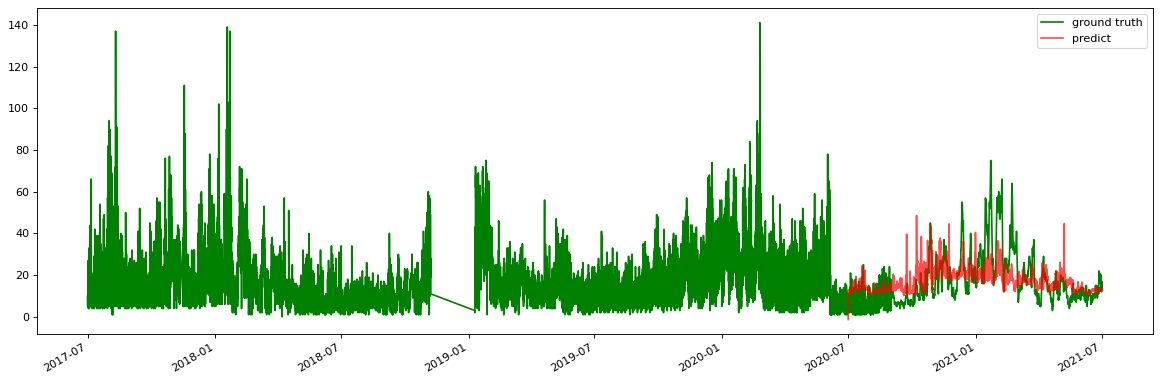

In [57]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(pd.concat([data['PM2.5'],test['PM2.5']]), color='g',label='ground truth')
pred.predicted_mean.plot(alpha=.7, color='r',label='predict')
plt.legend(loc="upper right")

plt.show()

In [58]:
import math

In [59]:
mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
rmse = math.sqrt(mse)
print('Test on SARIMAX with RMSE: %f' % (rmse, ))

Test on SARIMAX with RMSE: 10.635715


In [63]:
pred.predicted_mean.to_csv('rayong.csv', index=True)